# 22MIA1034 - Namansh Singh Maurya
## Lab_A_3 - CNN

# Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image

# Loading Dataset

In [ ]:
c = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = c.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

cn = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Model Building and Training

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,770 (225.66 KB)

 Trainable params: 57,770 (225.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3473 - loss: 1.7697 - val_accuracy: 0.5184 - val_loss: 1.3378
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.5547 - loss: 1.2515 - val_accuracy: 0.5978 - val_loss: 1.1444
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6116 - loss: 1.1045 - val_accuracy: 0.6172 - val_loss: 1.0801
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6471 - loss: 1.0009 - val_accuracy: 0.6460 - val_loss: 1.0118
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6753 - loss: 0.9286 - val_accuracy: 0.6499 - val_loss: 1.0127
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6953 - loss: 0.8704 - val_accuracy: 0.6730 - val_loss: 0.9453
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7075 - loss: 0.8268 - val_accuracy: 0.6676 - val_loss: 0.9755
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7268 - loss: 0.7839

# Prediction

In [ ]:
image_path ="/content/download.jpeg"

img = Image.open(image_path).resize((32,32))
img = np.array(img)/255.0
img = img.reshape(1,32,32,3)
pred = model.predict(img)
print(cn[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
airplane


# Showing the predicted Image

airplane


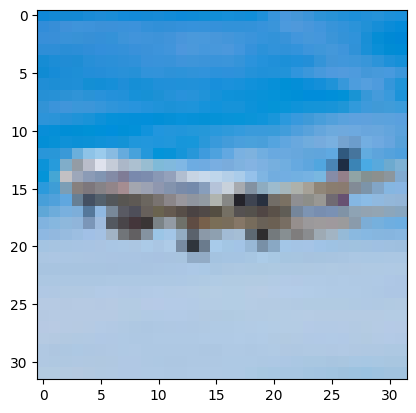

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img.squeeze(0))
x = np.argmax(pred)
print(cn[x])